Linear Kernel Decision Boundary

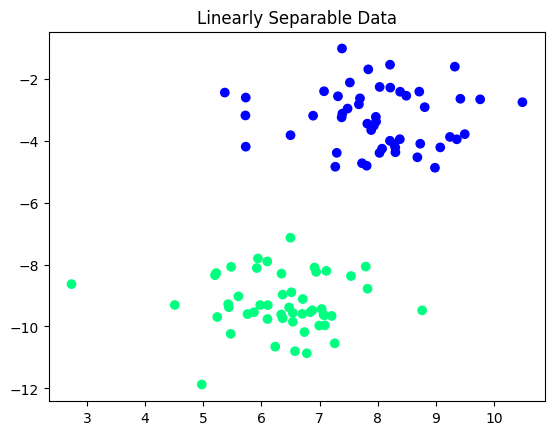

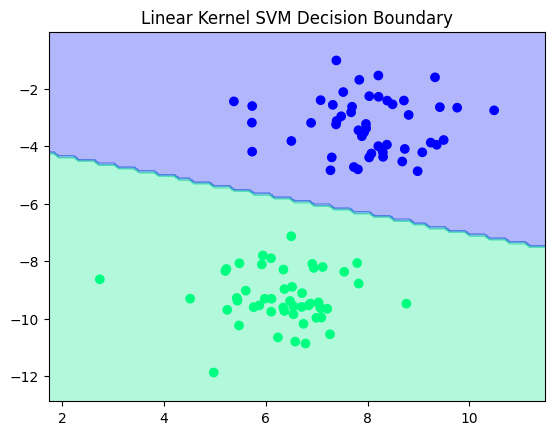

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate linearly separable data
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.title('Linearly Separable Data')
plt.show()

# Train SVM with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)

# Plot the decision boundary
def plot_svc_decision_boundary(svm, X, y):
    xlim = [X[:, 0].min()-1, X[:, 0].max()+1]
    ylim = [X[:, 1].min()-1, X[:, 1].max()+1]
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='winter')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
    plt.title('Linear Kernel SVM Decision Boundary')
    plt.show()

plot_svc_decision_boundary(linear_svm, X, y)


2. Polynomial Kernel

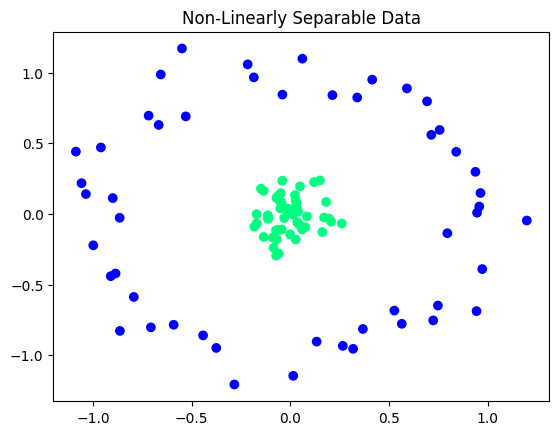

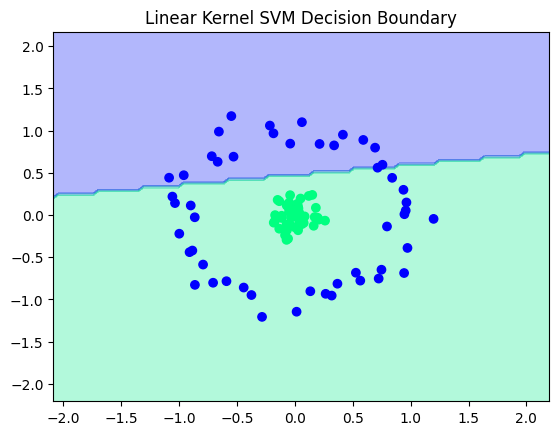

In [3]:
# Generate non-linearly separable data
X, y = datasets.make_circles(n_samples=100, factor=.1, noise=.1)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.title('Non-Linearly Separable Data')
plt.show()

# Train SVM with a linear kernel (no kernel trick)
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)

# Plot the decision boundary
plot_svc_decision_boundary(linear_svm, X, y)


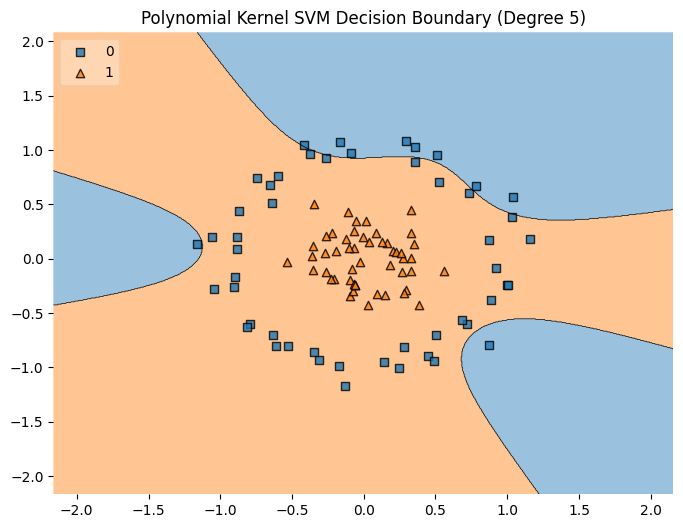

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions

# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)

# Fit the SVM model with a higher-degree polynomial kernel
svm_poly = SVC(kernel='poly', degree=5, C=100, gamma='auto')  # Higher degree and increased C
svm_poly.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, clf=svm_poly, legend=2)
plt.title('Polynomial Kernel SVM Decision Boundary (Degree 5)')
plt.show()


RBF kernel

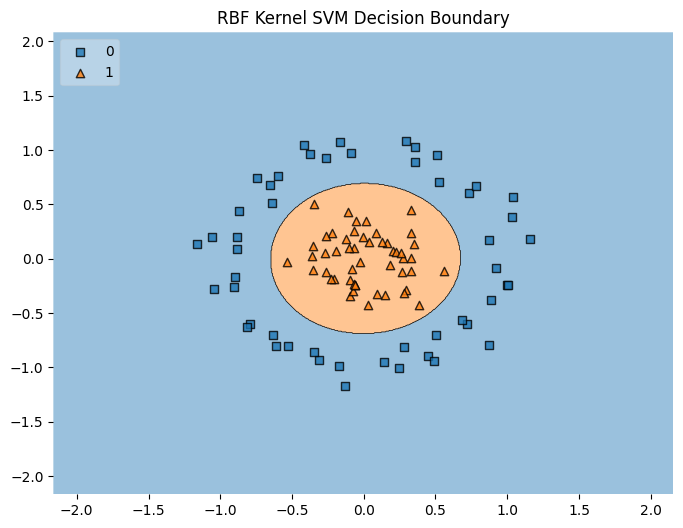

In [8]:
# Fit the SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='auto')
svm_rbf.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, clf=svm_rbf, legend=2)
plt.title('RBF Kernel SVM Decision Boundary')
plt.show()


Weights (w): [-2.  0.]
Bias (b): 5.0


<ipython-input-9-fd952f3c1616>:23: RuntimeWarning: divide by zero encountered in divide
  decision_boundary = -(w[0] * x2 + b) / w[1]


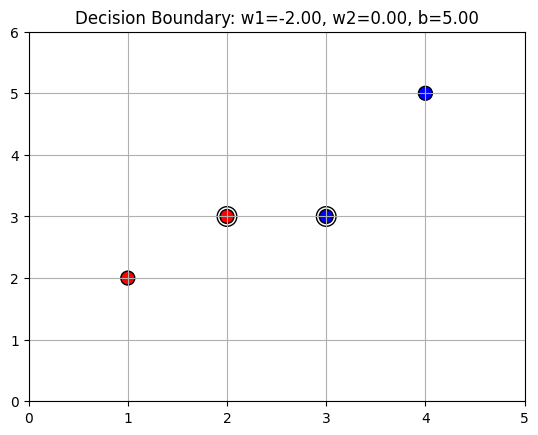

In [9]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Step 1: Define the data points and labels
X = np.array([[1, 2], [2, 3], [3, 3], [4, 5]])
y = np.array([1, 1, -1, -1])

# Step 2: Train the SVM with a linear kernel
svm = SVC(kernel='linear', C=1e10)  # Set a high C value to approximate hard margin
svm.fit(X, y)

# Step 3: Get the weights (w) and bias (b)
w = svm.coef_[0]
b = svm.intercept_[0]

print("Weights (w):", w)
print("Bias (b):", b)

# Step 4: Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='bwr', edgecolors='k')
x2 = np.linspace(0, 5, 100)
decision_boundary = -(w[0] * x2 + b) / w[1]
plt.plot(x2, decision_boundary, 'k-')

# Step 5: Highlight the support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')

plt.title(f'Decision Boundary: w1={w[0]:.2f}, w2={w[1]:.2f}, b={b:.2f}')
plt.xlim(0, 5)
plt.ylim(0, 6)
plt.grid(True)
plt.show()


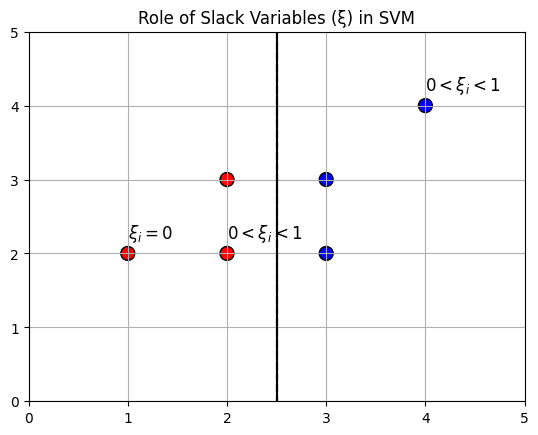

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create a simple dataset
X = np.array([[1, 2], [2, 2], [2, 3], [3, 3], [3, 2], [4, 4]])
y = np.array([1, 1, 1, -1, -1, -1])

# Train the SVM model
svm = SVC(kernel='linear', C=1)
svm.fit(X, y)

# Get the separating hyperplane
w = svm.coef_[0]
b = svm.intercept_[0]
x_plot = np.linspace(0, 5, 100)
decision_boundary = -(w[0] * x_plot + b) / w[1]

# Margins
margin = 1 / np.sqrt(np.sum(w**2))
margin_up = decision_boundary + margin
margin_down = decision_boundary - margin

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='bwr', edgecolors='k')

# Plot decision boundary and margins
plt.plot(x_plot, decision_boundary, 'k-')
plt.plot(x_plot, margin_up, 'k--')
plt.plot(x_plot, margin_down, 'k--')

# Annotate points for different ξ_i
plt.text(1, 2.2, r'$\xi_i = 0$', fontsize=12, color='black')   # Correctly classified, on the margin
plt.text(2, 2.2, r'$0 < \xi_i < 1$', fontsize=12, color='black') # Correctly classified, within the margin
plt.text(4, 4.2, r'$0 < \xi_i < 1$', fontsize=12, color='black') # Correctly classified, within the margin

plt.title('Role of Slack Variables (ξ) in SVM')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid(True)
plt.show()


<ipython-input-15-ee290a67b2a7>:17: RuntimeWarning: divide by zero encountered in divide
  decision_boundary = -(w[0] * x_plot + b) / w[1]
<ipython-input-15-ee290a67b2a7>:21: RuntimeWarning: divide by zero encountered in scalar divide
  margin_up = decision_boundary + margin * np.sqrt(1 + (w[0]/w[1])**2)
<ipython-input-15-ee290a67b2a7>:21: RuntimeWarning: invalid value encountered in add
  margin_up = decision_boundary + margin * np.sqrt(1 + (w[0]/w[1])**2)
<ipython-input-15-ee290a67b2a7>:22: RuntimeWarning: divide by zero encountered in scalar divide
  margin_down = decision_boundary - margin * np.sqrt(1 + (w[0]/w[1])**2)
<ipython-input-15-ee290a67b2a7>:22: RuntimeWarning: invalid value encountered in subtract
  margin_down = decision_boundary - margin * np.sqrt(1 + (w[0]/w[1])**2)


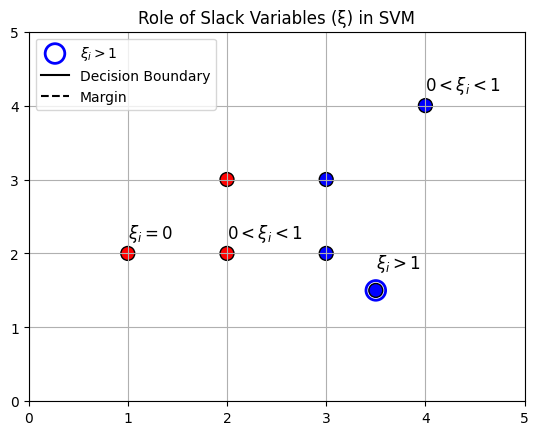

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create a simple dataset including a misclassified point
X = np.array([[1, 2], [2, 2], [2, 3], [3, 3], [3, 2], [4, 4], [3.5, 1.5]])
y = np.array([1, 1, 1, -1, -1, -1, -1])

# Train the SVM model
svm = SVC(kernel='linear', C=1)
svm.fit(X, y)

# Get the separating hyperplane
w = svm.coef_[0]
b = svm.intercept_[0]
x_plot = np.linspace(0, 5, 100)
decision_boundary = -(w[0] * x_plot + b) / w[1]

# Correctly calculate the margin distance
margin = 1 / np.sqrt(np.sum(w**2))
margin_up = decision_boundary + margin * np.sqrt(1 + (w[0]/w[1])**2)
margin_down = decision_boundary - margin * np.sqrt(1 + (w[0]/w[1])**2)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='bwr', edgecolors='k')

# Highlight the misclassified point (ξ > 1)
misclassified_point = X[-1]  # Assuming the last point is the misclassified one
plt.scatter(misclassified_point[0], misclassified_point[1], s=200, facecolors='none', edgecolors='blue', linewidths=2, label=r'$\xi_i > 1$')

# Plot decision boundary and margins
plt.plot(x_plot, decision_boundary, 'k-', label='Decision Boundary')
plt.plot(x_plot, margin_up, 'k--', label='Margin')
plt.plot(x_plot, margin_down, 'k--')

# Annotate points for different ξ_i
plt.text(1, 2.2, r'$\xi_i = 0$', fontsize=12, color='black')   # Correctly classified, on the margin
plt.text(2, 2.2, r'$0 < \xi_i < 1$', fontsize=12, color='black') # Correctly classified, within the margin
plt.text(4, 4.2, r'$0 < \xi_i < 1$', fontsize=12, color='black') # Correctly classified, within the margin
plt.text(3.5, 1.8, r'$\xi_i > 1$', fontsize=12, color='black')   # Misclassified point

plt.title('Role of Slack Variables (ξ) in SVM')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid(True)
plt.legend()
plt.show()


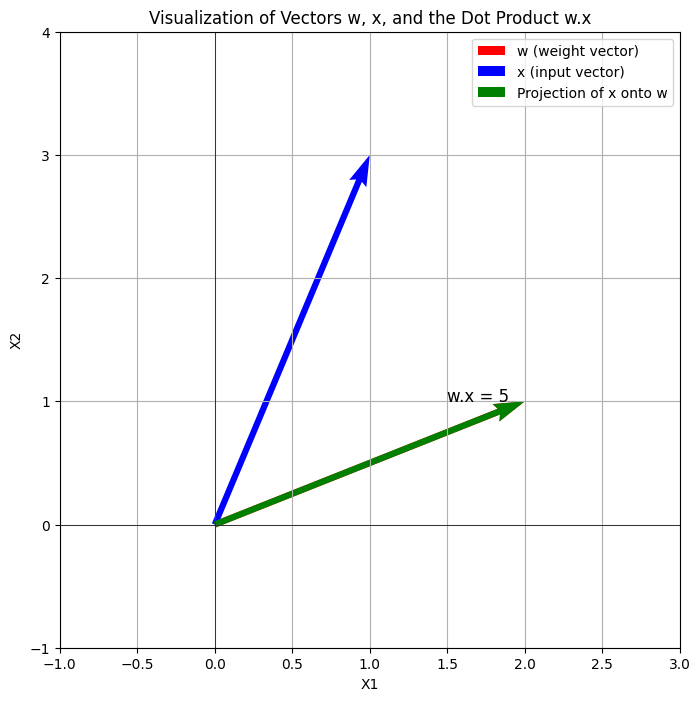

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors
w = np.array([2, 1])
x = np.array([1, 3])

# Calculate the dot product
dot_product = np.dot(w, x)

# Calculate the projection of x onto w
projection = (dot_product / np.dot(w, w)) * w

# Plotting
plt.figure(figsize=(8, 8))

# Plot vector w with larger arrow
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='r', label='w (weight vector)', width=0.01)

# Plot vector x
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', label='x (input vector)', width=0.01)

# Plot the projection of x onto w
plt.quiver(0, 0, projection[0], projection[1], angles='xy', scale_units='xy', scale=1, color='g', label='Projection of x onto w', width=0.01)

# Adding the dot product as text
plt.text(1.5, 1, f'w.x = {dot_product}', fontsize=12, color='black')

# Set the limits and grid
plt.xlim(-1, 3)
plt.ylim(-1, 4)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Set the labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Visualization of Vectors w, x, and the Dot Product w.x')

plt.legend()
plt.show()


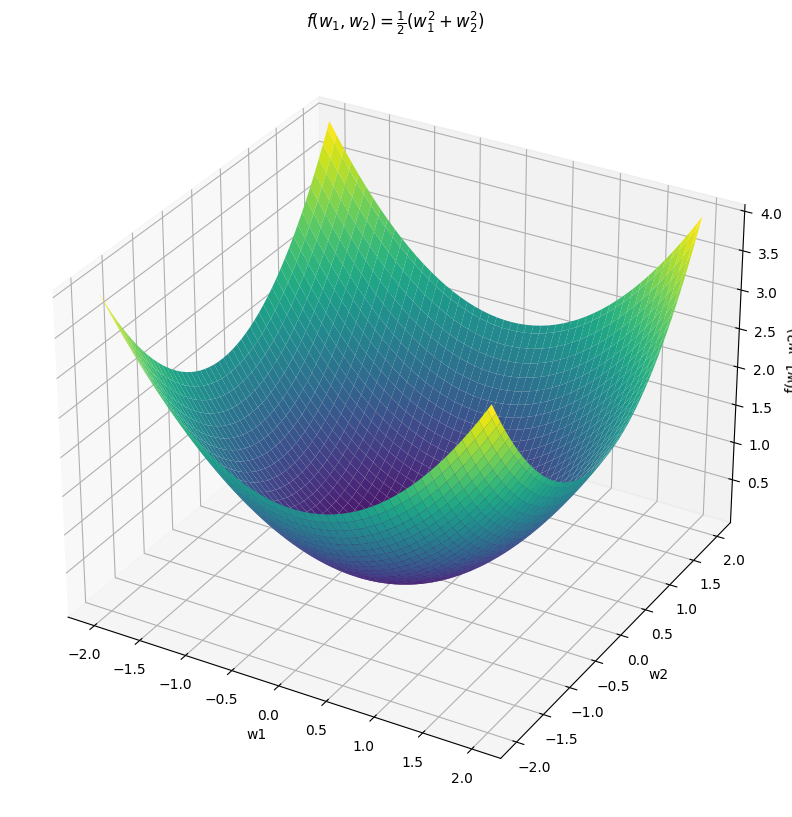

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of w1 and w2 values
w1 = np.linspace(-2, 2, 100)
w2 = np.linspace(-2, 2, 100)
w1, w2 = np.meshgrid(w1, w2)

# Calculate the quadratic function f(w1, w2) = 1/2 * (w1^2 + w2^2)
f = 0.5 * (w1**2 + w2**2)

# Plotting the surface
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(w1, w2, f, cmap='viridis')

# Set labels
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('f(w1, w2)')
ax.set_title(r'$f(w_1, w_2) = \frac{1}{2} (w_1^2 + w_2^2)$')

plt.show()


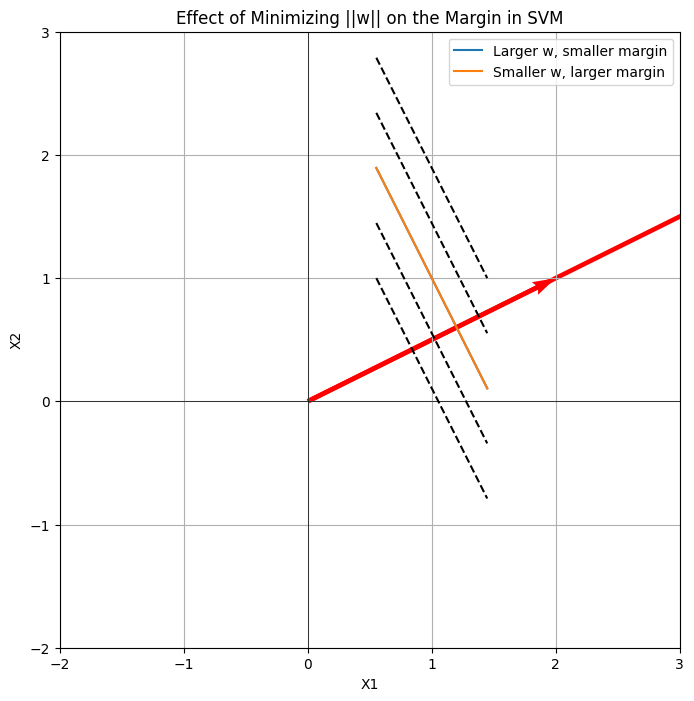

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors for two scenarios
w_large = np.array([4, 2])  # Larger norm, smaller margin
w_small = np.array([2, 1])  # Smaller norm, larger margin

# Define a point on the hyperplane
x1 = np.array([1, 1])
x2 = np.array([1, 1])

# Create a function to plot the margin and hyperplane
def plot_svm(w, label):
    margin = 2 / np.linalg.norm(w)
    x2 = x1 + np.array([w[1], -w[0]]) * margin / 2
    x3 = x1 - np.array([w[1], -w[0]]) * margin / 2

    # Plot the hyperplane
    plt.plot([x3[0], x2[0]], [x3[1], x2[1]], label=label)

    # Plot the margin boundaries
    plt.plot([x3[0], x2[0]], [x3[1] - margin, x2[1] - margin], 'k--')
    plt.plot([x3[0], x2[0]], [x3[1] + margin, x2[1] + margin], 'k--')

    # Plot the vector w
    plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='r')

# Plot the scenarios
plt.figure(figsize=(8, 8))
plot_svm(w_large, 'Larger w, smaller margin')
plot_svm(w_small, 'Smaller w, larger margin')

plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Effect of Minimizing ||w|| on the Margin in SVM')
plt.show()


Iteration 0: Cost 0.6788816612054318
Iteration 100: Cost 0.28746567128159006
Iteration 200: Cost 0.21733958069098358
Iteration 300: Cost 0.18374905929278335
Iteration 400: Cost 0.16298841687464677
Iteration 500: Cost 0.1485002819167559
Iteration 600: Cost 0.13763418060437518
Iteration 700: Cost 0.12908414358667947
Iteration 800: Cost 0.12212152915331743
Iteration 900: Cost 0.1163032866899085
Optimal coefficients (w): [ 1.52179714  2.8321645  -4.43292449]


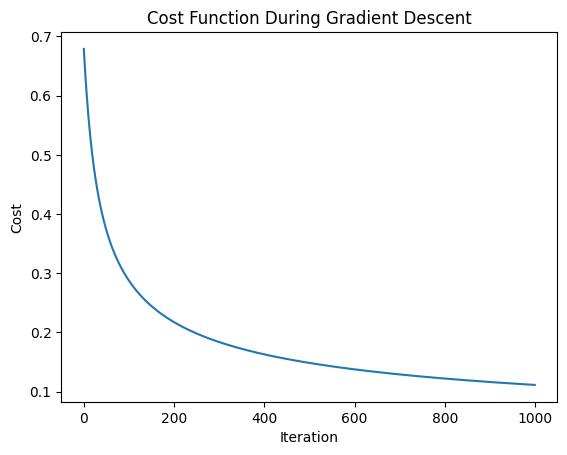

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple binary classification dataset
np.random.seed(42)  # Set the random seed for reproducibility
X = np.random.randn(100, 2)  # Generate 100 samples with 2 features each from a standard normal distribution
y = (np.dot(X, np.array([2, -3])) + 1 > 0).astype(int)  # Create binary labels based on a linear combination of X

# Add a column of ones to X for the bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a bias term (intercept) by concatenating a column of ones to X

# Initialize coefficients w and b
w = np.zeros(X_b.shape[1])  # Initialize the weight vector w with zeros, including the bias term

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # The sigmoid function maps any real-valued number to a probability between 0 and 1

# Define the cost function (logistic loss)
def compute_cost(X, y, w):
    m = len(y)  # Number of training examples
    h = sigmoid(np.dot(X, w))  # Compute the predicted probabilities using the current weights w
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))  # Compute the logistic loss (binary cross-entropy)
    return cost  # Return the cost value

# Define the gradient of the cost function
def compute_gradient(X, y, w):
    m = len(y)  # Number of training examples
    h = sigmoid(np.dot(X, w))  # Compute the predicted probabilities using the current weights w
    gradient = (1/m) * np.dot(X.T, (h - y))  # Compute the gradient of the cost function with respect to w
    return gradient  # Return the gradient vector

# Gradient descent algorithm
def gradient_descent(X, y, w, learning_rate, iterations):
    cost_history = []  # Initialize a list to store the cost function value at each iteration

    for i in range(iterations):
        gradient = compute_gradient(X, y, w)  # Calculate the gradient for the current weights
        w = w - learning_rate * gradient  # Update the weights by moving in the direction opposite to the gradient
        cost = compute_cost(X, y, w)  # Calculate the cost function value for the updated weights
        cost_history.append(cost)  # Store the cost function value

        # Print the cost every 100 iterations to monitor progress
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return w, cost_history  # Return the optimized weights and the cost history

# Set learning rate and number of iterations
learning_rate = 0.1  # The learning rate controls how big a step we take in the direction of the gradient
iterations = 1000  # The number of iterations to run the gradient descent algorithm

# Perform gradient descent to find the best w and b
w_optimal, cost_history = gradient_descent(X_b, y, w, learning_rate, iterations)  # Optimize the weights using gradient descent

# Print the optimal coefficients
print("Optimal coefficients (w):", w_optimal)  # Display the learned weights after optimization

# Plot the cost function over iterations
plt.plot(cost_history)  # Plot the cost function values over the iterations
plt.xlabel("Iteration")  # Label the x-axis as 'Iteration'
plt.ylabel("Cost")  # Label the y-axis as 'Cost'
plt.title("Cost Function During Gradient Descent")  # Set the title of the plot
plt.show()  # Display the plot


<ipython-input-10-c07126a9b955>:8: RuntimeWarning: overflow encountered in exp
  logistic_values = 1 / (1 + np.exp(-x_values))


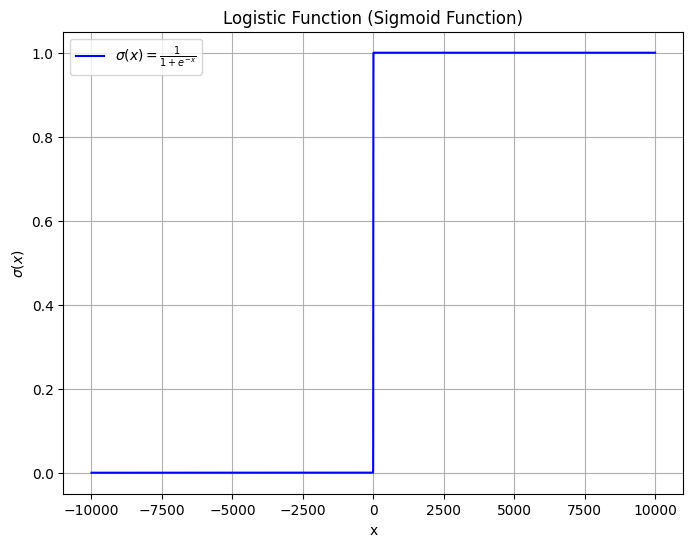

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 500 values of x from -10 to 10
x_values = np.linspace(-10000, 10000, 50000)

# Compute the logistic function for each x value
logistic_values = 1 / (1 + np.exp(-x_values))

# Plot the logistic function
plt.figure(figsize=(8, 6))
plt.plot(x_values, logistic_values, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='blue')

# Add labels and title
plt.xlabel('x')
plt.ylabel(r'$\sigma(x)$')
plt.title('Logistic Function (Sigmoid Function)')

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


The main advantage of distributed training using a strategy like MirroredStrategy is the ability to scale up the training process by utilizing multiple devices simultaneously. This leads to faster training, better utilization of resources, and the ability to handle larger datasets and models that might be infeasible with a single device.

MirroredStrategy:

tf.distribute.MirroredStrategy() is designed for synchronous distributed training. It creates copies (or "mirrors") of the model on each GPU (or CPU) available on the machine.
During training, each device (GPU/CPU) processes a portion of the data independently.

In [16]:
import tensorflow as tf
import numpy as np

# Set up the strategy for distributed training
strategy = tf.distribute.MirroredStrategy()

# Define a simple linear model
def build_model():
    return tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Generate synthetic data for linear regression
np.random.seed(0)
X = np.random.randn(1000, 1)
y = 3 * X + 2 + np.random.randn(1000, 1) * 0.1

# Create TensorFlow dataset and batch it
dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(32)

# Distribute the dataset using the strategy
distributed_dataset = strategy.experimental_distribute_dataset(dataset)

# Define a mean squared error loss function
loss_fn = tf.keras.losses.MeanSquaredError()

# Define an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Define a single training step function
@tf.function
def train_step(iterator):
    def step_fn(inputs):
        x, y = inputs
        with tf.GradientTape() as tape:
            predictions = model(x, training=True)
            loss = loss_fn(y, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        return loss

    return strategy.run(step_fn, args=(next(iterator),))

# Training loop
with strategy.scope():
    # Build the model within the strategy's scope
    model = build_model()

    # Training loop for a number of epochs
    for epoch in range(10):
        total_loss = 0.0
        num_batches = 0
        iterator = iter(distributed_dataset)

        for _ in range(len(X) // 32):
            total_loss += train_step(iterator)
            num_batches += 1

        print(f'Epoch {epoch + 1}, Loss: {total_loss / num_batches}')


Epoch 1, Loss: 3.2218434810638428
Epoch 2, Loss: 0.9813926815986633
Epoch 3, Loss: 0.3038952648639679
Epoch 4, Loss: 0.09875386953353882
Epoch 5, Loss: 0.03655241057276726
Epoch 6, Loss: 0.01766214706003666
Epoch 7, Loss: 0.011913653463125229
Epoch 8, Loss: 0.010159250348806381
Epoch 9, Loss: 0.00962141528725624
Epoch 10, Loss: 0.009455331601202488


In [17]:
import tensorflow as tf
import numpy as np

# Set up the strategy for distributed training
strategy = tf.distribute.MirroredStrategy()

# Define a simple linear model
def build_model():
    return tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Generate synthetic data for linear regression
np.random.seed(0)
X = np.random.randn(1000, 1)
y = 3 * X + 2 + np.random.randn(1000, 1) * 0.1

# Create TensorFlow dataset and batch it
dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(32)

# Distribute the dataset using the strategy
distributed_dataset = strategy.experimental_distribute_dataset(dataset)

# Define a mean squared error loss function
loss_fn = tf.keras.losses.MeanSquaredError()

# Define an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Define a single training step function
@tf.function
def train_step(iterator):
    def step_fn(inputs):
        x, y = inputs
        with tf.GradientTape() as tape:
            predictions = model(x, training=True)
            loss = loss_fn(y, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)

        # Log the device and gradients information
        for i, grad in enumerate(gradients):
            tf.print(f"Device: {tf.distribute.get_replica_context().replica_id_in_sync_group}, Gradient for variable {i}: {grad}")

        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        return loss

    # Run the step function on each device
    return strategy.run(step_fn, args=(next(iterator),))

# Training loop
with strategy.scope():
    # Build the model within the strategy's scope
    model = build_model()

    # Training loop for a number of epochs
    for epoch in range(10):
        total_loss = 0.0
        num_batches = 0
        iterator = iter(distributed_dataset)

        for _ in range(len(X) // 32):
            total_loss += train_step(iterator)
            num_batches += 1

        print(f'Epoch {epoch + 1}, Loss: {total_loss / num_batches}')


Device: Tensor("replica_id_in_sync_group:0", shape=(), dtype=int32, device=/job:localhost/replica:0/task:0/device:CPU:0), Gradient for variable 0: Tensor("gradient_tape/sequential_1_1/dense_1_1/MatMul/MatMul:0", shape=(1, 1), dtype=float32, device=/job:localhost/replica:0/task:0/device:CPU:0)
Device: Tensor("replica_id_in_sync_group_1:0", shape=(), dtype=int32, device=/job:localhost/replica:0/task:0/device:CPU:0), Gradient for variable 1: Tensor("gradient_tape/sequential_1_1/dense_1_1/Add/Reshape:0", shape=(1,), dtype=float32, device=/job:localhost/replica:0/task:0/device:CPU:0)
Device: Tensor("replica_id_in_sync_group:0", shape=(), dtype=int32, device=/job:localhost/replica:0/task:0/device:CPU:0), Gradient for variable 0: Tensor("gradient_tape/sequential_1_1/dense_1_1/MatMul/MatMul:0", shape=(1, 1), dtype=float32, device=/job:localhost/replica:0/task:0/device:CPU:0)
Device: Tensor("replica_id_in_sync_group_1:0", shape=(), dtype=int32, device=/job:localhost/replica:0/task:0/device:CPU:

Per-Replica Gradient and Loss Calculation:

per_replica_gradients, per_replica_loss = strategy.run(step_fn, args=(next(iterator),)): This captures the gradients and loss computed on each device (replica).

Logging Device Information:

Inside the step_fn, tf.print(f"Device: {tf.distribute.get_replica_context().replica_id_in_sync_group}, Gradient for variable {i}: {grad}") logs the gradients for each variable along with the device ID. This shows which device computed which gradient.

In [19]:
import tensorflow as tf
import numpy as np

# Set up the strategy for distributed training
strategy = tf.distribute.MirroredStrategy()

# Define a simple linear model
def build_model():
    return tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Generate synthetic data for linear regression
np.random.seed(0)
X = np.random.randn(1000, 1)
y = 3 * X + 2 + np.random.randn(1000, 1) * 0.1

# Create TensorFlow dataset and batch it
dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(32)

# Distribute the dataset using the strategy
distributed_dataset = strategy.experimental_distribute_dataset(dataset)

# Define a mean squared error loss function
loss_fn = tf.keras.losses.MeanSquaredError()

# Define an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Define a single training step function
@tf.function
def train_step(iterator):
    def step_fn(inputs):
        x, y = inputs
        with tf.GradientTape() as tape:
            predictions = model(x, training=True)
            loss = loss_fn(y, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)

        # Log the device and gradients information
        for i, grad in enumerate(gradients):
            tf.print(f"Device: {tf.distribute.get_replica_context().replica_id_in_sync_group}, Gradient for variable {i}: {grad}")

        return gradients, loss

    per_replica_gradients, per_replica_loss = strategy.run(step_fn, args=(next(iterator),))

    # Aggregate the gradients from all replicas
    reduced_gradients = [
        strategy.reduce(tf.distribute.ReduceOp.SUM, grad, axis=None)
        for grad in zip(*per_replica_gradients)
    ]

    mean_loss = strategy.reduce(tf.distribute.ReduceOp.MEAN, per_replica_loss, axis=None)

    optimizer.apply_gradients(zip(reduced_gradients, model.trainable_variables))

    return mean_loss

# Training loop
with strategy.scope():
    # Build the model within the strategy's scope
    model = build_model()

    # Training loop for a number of epochs
    for epoch in range(10):
        total_loss = 0.0
        num_batches = 0
        iterator = iter(distributed_dataset)

        for _ in range(len(X) // 32):
            total_loss += train_step(iterator)
            num_batches += 1

        print(f'Epoch {epoch + 1}, Loss: {total_loss / num_batches}')


OperatorNotAllowedInGraphError: in user code:

    File "<ipython-input-19-a89167c146e8>", line 48, in train_step  *
        reduced_gradients = [

    OperatorNotAllowedInGraphError: Iterating over a symbolic `tf.Tensor` is not allowed. You can attempt the following resolutions to the problem: If you are running in Graph mode, use Eager execution mode or decorate this function with @tf.function. If you are using AutoGraph, you can try decorating this function with @tf.function. If that does not work, then you may be using an unsupported feature or your source code may not be visible to AutoGraph. See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/limitations.md#access-to-source-code for more information.


In [ ]:
# Define a simple linear model
def build_model():
    return tf.keras.Sequential([tf.keras.layers.Dense(1)])



200

